In [37]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [38]:
bat_dc=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx'

In [39]:


def cal_relative(df):
    lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
    upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
    diff=upper_bound-lower_bound
    df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
    enhance=df[(df.p_grid_max_method=="by_execution")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]-\
        df[(df.p_grid_max_method=="minimize_cap")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]
    return enhance

In [40]:
def pivot_data(fn,keys):
    all_df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    all_df["relative_OPEX"]=None
    grouped=all_df.groupby(by=keys).apply(cal_relative)
    grouped_ehance=pd.DataFrame(grouped)
    grouped_ehance=grouped_ehance.reset_index()
    if 'B_kWh' in keys:
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh']/73.6
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh'].round(0)
    if 'price_dc' in keys:  
        grouped_ehance['price_dc']=grouped_ehance['price_dc']*30
        grouped_ehance['price_dc']=grouped_ehance['price_dc'].round(0)
    data=grouped_ehance.pivot(index=keys[0],columns=keys[1])
    return data[0]

In [41]:
dc_bat=pivot_data(
    r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx',
    ['B_kWh','price_dc']
)
pv_dc=pivot_data(
    r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G3-bat6h-dc-pv.xlsx',
    ['pv_to_bld','price_dc']
)
bat_pv=pivot_data(
    r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G2-bat-dc0.6-pv.xlsx',
    ['B_kWh','pv_to_bld']
)

In [42]:
bat_pv.index=bat_pv.index.astype(int)
dc_bat.index=dc_bat.index.astype(int)

In [43]:
dc_bat.columns=dc_bat.columns.astype(int)

In [44]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)

Text(0.5, 0.0, 'Relative regret OPEX improvement')

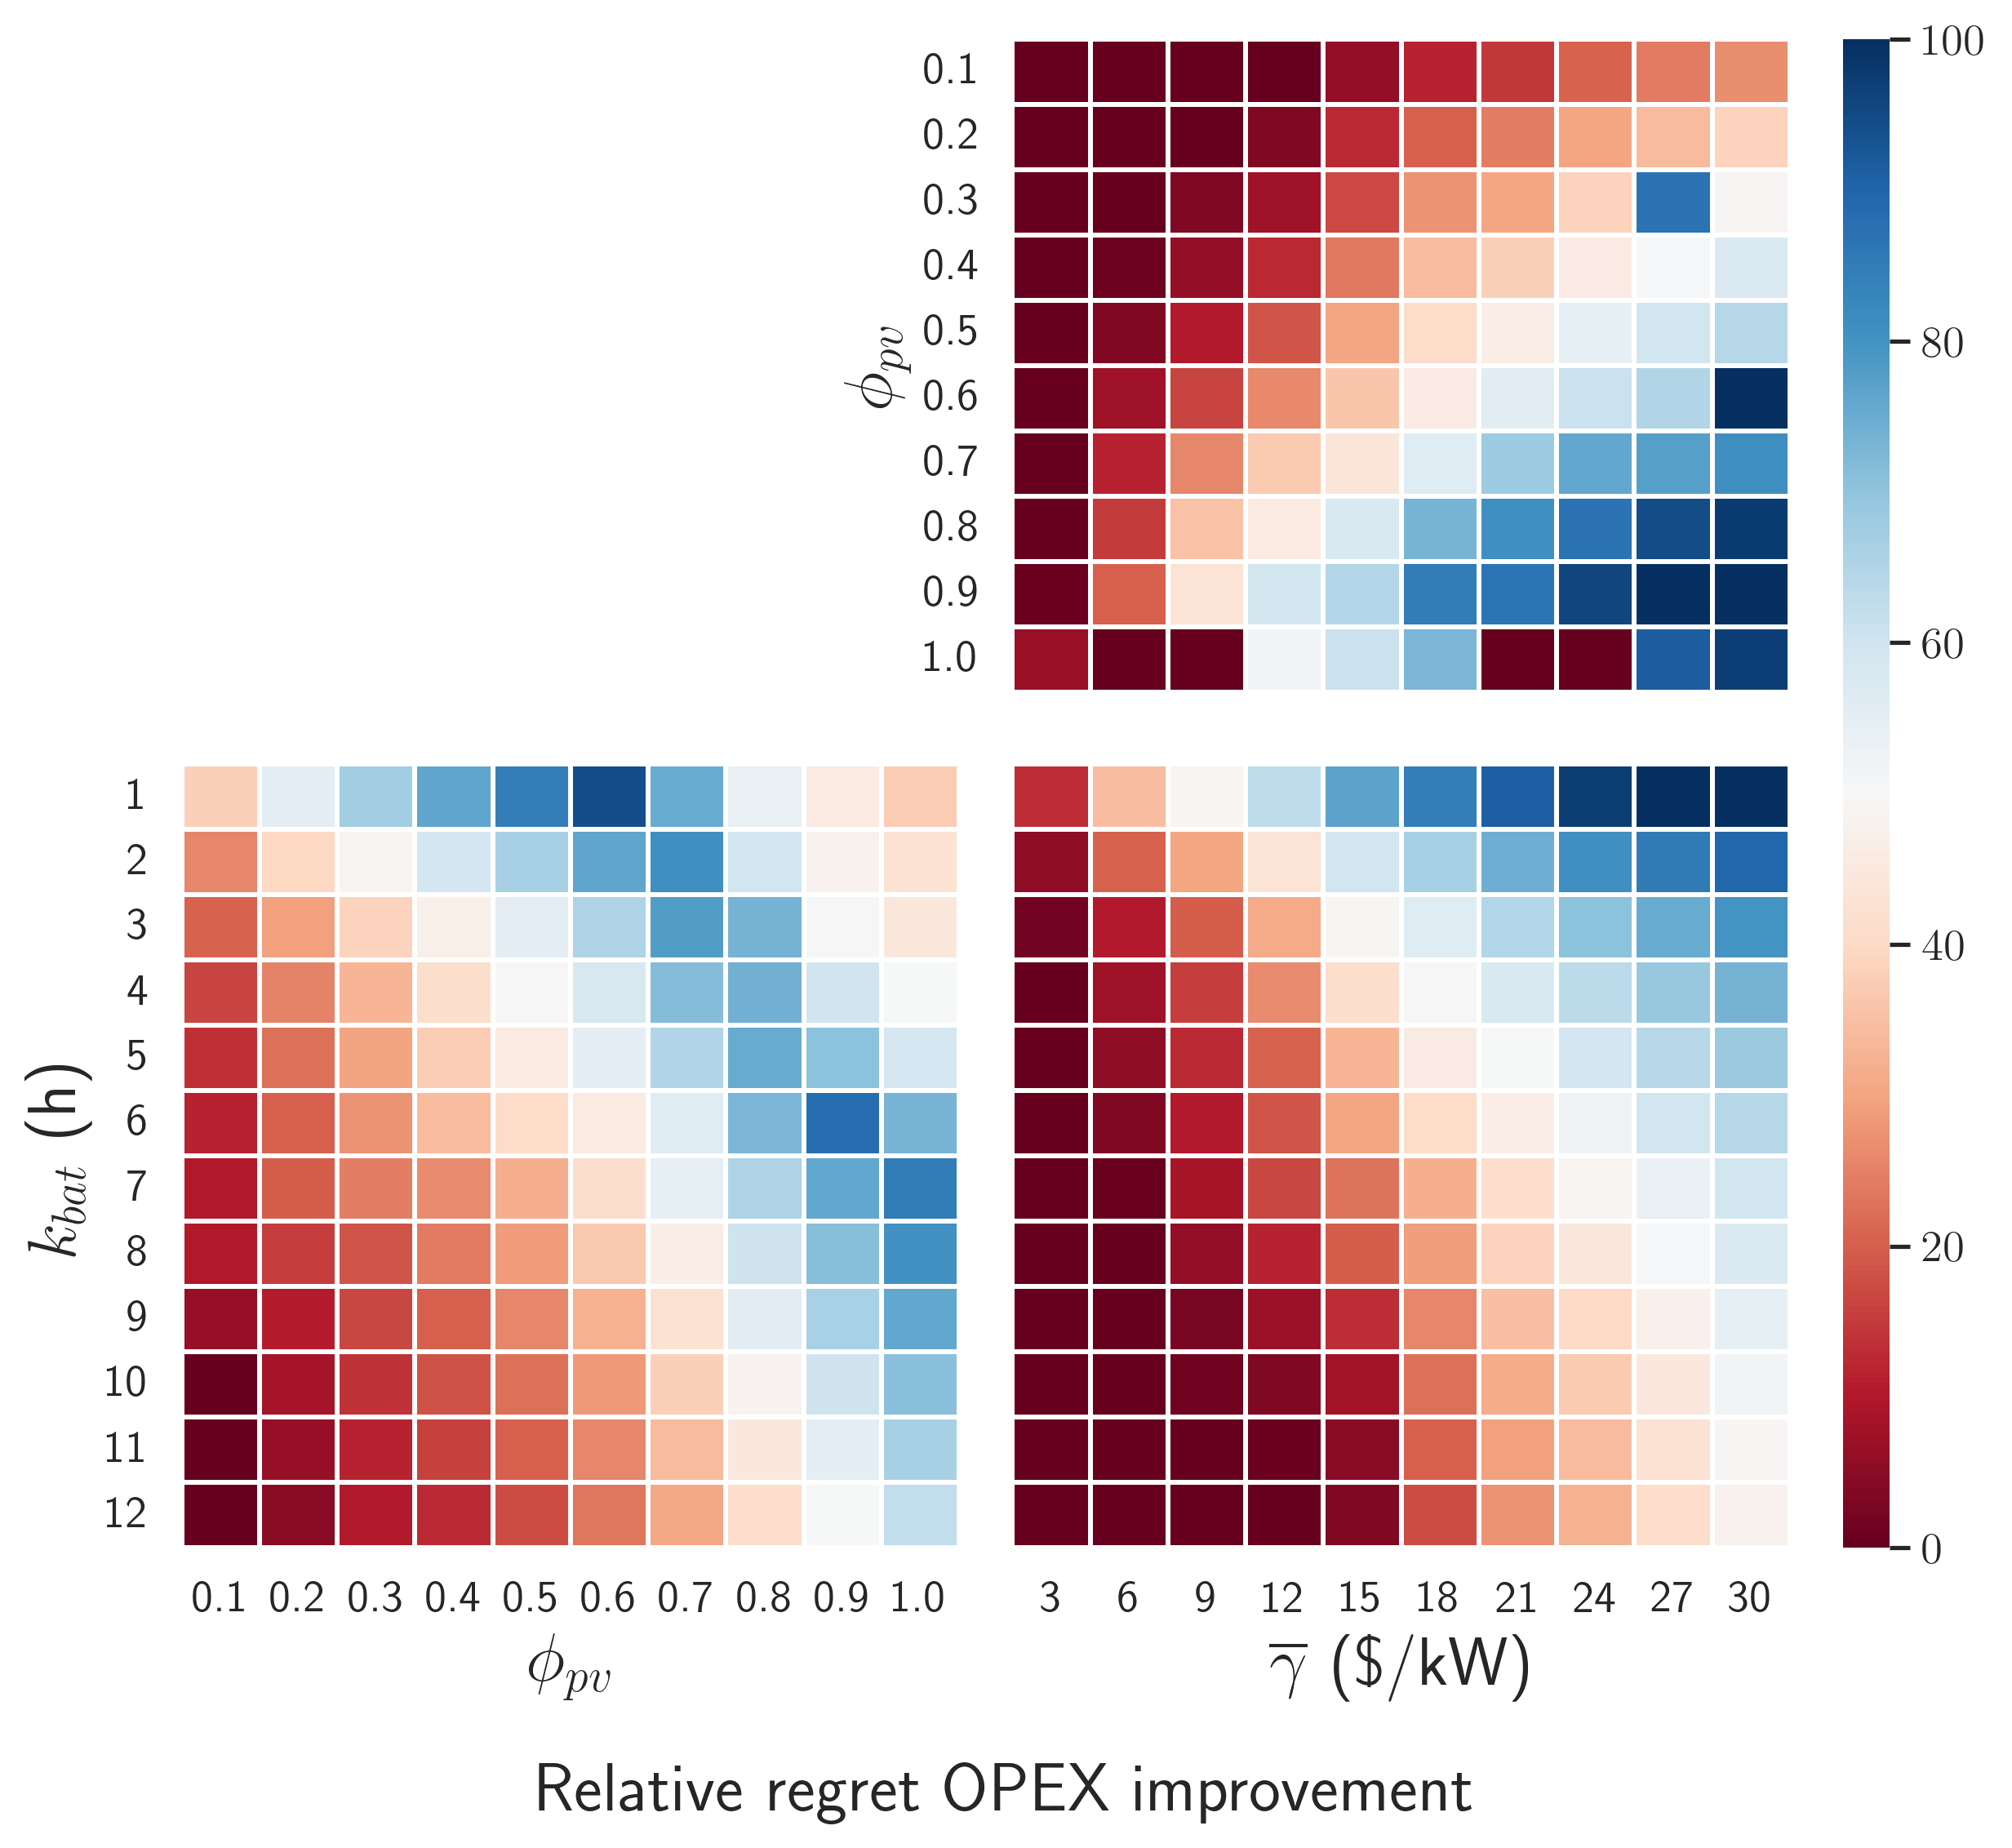

In [55]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(9, 8))  # 创建画布
grid = gridspec.GridSpec(2, 3,width_ratios=[1,1,0.06],height_ratios=[1,1.2])  # 设定2行*3列的网格
grid.update(wspace = 0.1, hspace = 0.1)
ax1 = fig.add_subplot(grid[0, 1])  # pv_dc
ax2 = fig.add_subplot(grid[1, 0])  # bat_pv
ax3 = fig.add_subplot(grid[1, 1])  # bat_dc
ax4 = fig.add_subplot(grid[0:2, 2])  # 第一行的全部列都添加到ax1中

sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap="RdBu",linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax2,data=bat_pv,square=False,vmin=0,vmax=100,cmap="RdBu",linewidths=1,cbar=False) 
sns.heatmap(ax=ax3,data=dc_bat,square=False,vmin=0,vmax=100,cmap="RdBu",linewidths=1,cbar_ax=ax4,yticklabels=False) 

ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.set_ylabel("$\phi_{pv}$",fontsize=20)
ax1.set_yticklabels(labels=ax1.get_yticklabels(),rotation=0)

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\phi_{pv}$",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)


sns.set(font_scale=1.2)
plt.suptitle("Relative regret OPEX improvement",y=0.0,fontsize=20)